In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
df= pd.read_csv('Data_Application of machine learning methods for the prediction of crystal system of cathode materials in lithium-ion batteries.csv')
df

C:\Users\YOGESH\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


In [2]:
df.shape

(339, 11)

In [3]:
#check the value counts for all the features
for i in df.columns:
    print(df[i].value_counts())
    print()

mp-849394    1
mp-762648    1
mp-762827    1
mp-865154    1
mp-868335    1
            ..
mp-767356    1
mp-762751    1
mp-763389    1
mp-773761    1
mp-767320    1
Name: Materials Id, Length: 339, dtype: int64

LiFeSiO4           42
LiCoSiO4           29
Li2FeSiO4          15
Li2CoSiO4          14
Li2MnSiO4          12
                   ..
Li3Co2Si3O10        1
Li10Co(SiO5)2       1
Li4Co2Si3O10        1
Li2FeSi4O11         1
Li5Co4(Si3O10)2     1
Name: Formula, Length: 114, dtype: int64

P1         72
P21/c      32
Pc         27
P21        23
Cc         16
C2/c       15
C2         12
Pna21      12
Pcmn        8
P21nb       8
Pnma        8
C2/m        6
C2221       6
Fdd2        6
Pbn21       6
C2cm        6
Pbca        6
Cmce        6
Pc21n       6
P212121     6
Pb21a       5
Pbnm        4
Pmnb        4
C222        3
P21nm       3
Pca21       3
Cmcm        3
P2/m        3
Imma        2
F2dd        2
P2          2
Pmn21       2
Pnca        2
Pm21n       2
P21/m       2
Pn21a       2


In [4]:
#check the number of null values for each feature
df.isnull().sum()

Materials Id             0
Formula                  0
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV)        0
Band Gap (eV)            0
Nsites                   0
Density (gm/cc)          0
Volume                   0
Has Bandstructure        0
Crystal System           0
dtype: int64

# Correlation map

<AxesSubplot:>

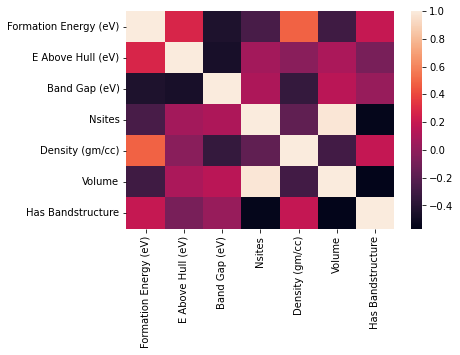

In [5]:
sns.heatmap(df.corr())

In [6]:
selected_column = df[['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)','Nsites','Density (gm/cc)','Volume','Crystal System']]

selected_column

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Crystal System
0,-2.699,0.006,3.462,16,2.993,178.513,monoclinic
1,-2.696,0.008,2.879,32,2.926,365.272,monoclinic
2,-2.775,0.012,3.653,28,2.761,301.775,monoclinic
3,-2.783,0.013,3.015,38,2.908,436.183,monoclinic
4,-2.747,0.016,2.578,36,3.334,421.286,monoclinic
...,...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,2.753,171.772,triclinic
335,-2.250,0.076,0.005,42,3.318,552.402,triclinic
336,-2.529,0.082,0.176,35,2.940,428.648,triclinic
337,-2.348,0.087,1.333,14,2.451,214.044,triclinic


# Scatter plot

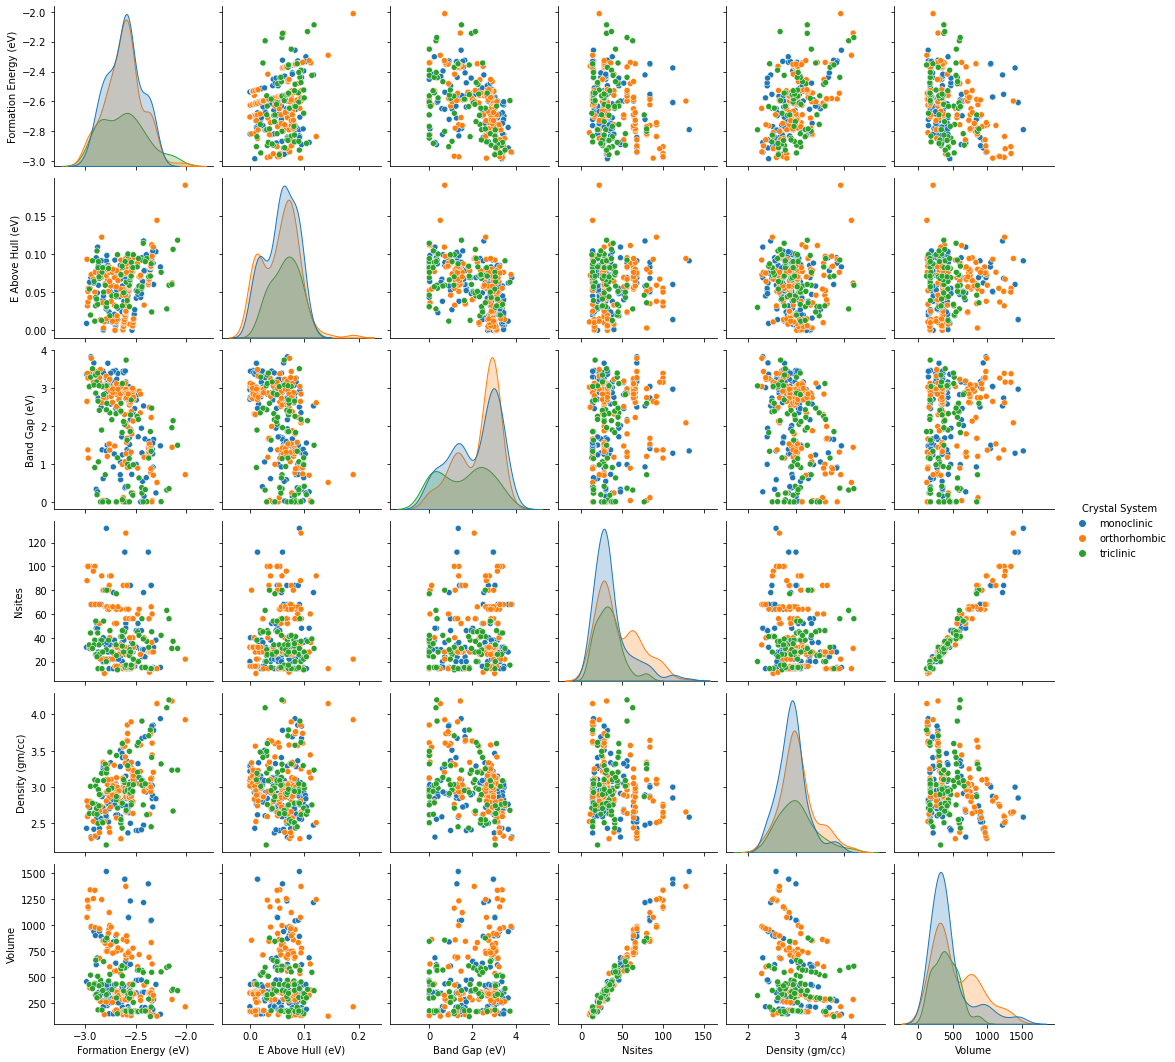

In [7]:
sns.pairplot(selected_column,hue='Crystal System')

In [8]:
 df1= df[['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)','Nsites','Volume','Crystal System']]

df1

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume,Crystal System
0,-2.699,0.006,3.462,16,178.513,monoclinic
1,-2.696,0.008,2.879,32,365.272,monoclinic
2,-2.775,0.012,3.653,28,301.775,monoclinic
3,-2.783,0.013,3.015,38,436.183,monoclinic
4,-2.747,0.016,2.578,36,421.286,monoclinic
...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,171.772,triclinic
335,-2.250,0.076,0.005,42,552.402,triclinic
336,-2.529,0.082,0.176,35,428.648,triclinic
337,-2.348,0.087,1.333,14,214.044,triclinic


In [9]:
# Apply one-hot encoding using pandas get_dummies function
df2 = pd.get_dummies(data=df1,columns = ['Crystal System'], drop_first=True) #drop_first=True
df2

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume,Crystal System_orthorhombic,Crystal System_triclinic
0,-2.699,0.006,3.462,16,178.513,0,0
1,-2.696,0.008,2.879,32,365.272,0,0
2,-2.775,0.012,3.653,28,301.775,0,0
3,-2.783,0.013,3.015,38,436.183,0,0
4,-2.747,0.016,2.578,36,421.286,0,0
...,...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,171.772,0,1
335,-2.250,0.076,0.005,42,552.402,0,1
336,-2.529,0.082,0.176,35,428.648,0,1
337,-2.348,0.087,1.333,14,214.044,0,1


In [10]:
X=df2.iloc[:,0:5]
y=df2.iloc[:,5:8]

In [11]:
X

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume
0,-2.699,0.006,3.462,16,178.513
1,-2.696,0.008,2.879,32,365.272
2,-2.775,0.012,3.653,28,301.775
3,-2.783,0.013,3.015,38,436.183
4,-2.747,0.016,2.578,36,421.286
...,...,...,...,...,...
334,-2.545,0.071,2.685,17,171.772
335,-2.250,0.076,0.005,42,552.402
336,-2.529,0.082,0.176,35,428.648
337,-2.348,0.087,1.333,14,214.044


In [12]:
y

,Crystal System_orthorhombic,Crystal System_triclinic
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,1
335,0,1
336,0,1
337,0,1


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [14]:
X_train

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume
295,-2.585,0.039,1.626,15,178.210
139,-2.705,0.000,3.052,16,175.842
282,-2.605,0.090,0.000,15,177.985
270,-2.194,0.028,0.311,63,595.723
234,-2.342,0.112,0.000,36,377.974
...,...,...,...,...,...
8,-2.822,0.038,0.612,20,218.360
73,-2.324,0.060,1.646,32,287.056
118,-2.369,0.066,1.374,28,347.967
189,-2.598,0.024,2.979,56,715.629


In [15]:
X_test

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume
53,-2.603,0.024,2.931,16,175.643
99,-2.523,0.014,2.934,16,171.080
201,-2.904,0.050,3.152,100,1338.234
305,-2.595,0.063,3.736,17,174.618
21,-2.612,0.083,0.000,30,362.254
...,...,...,...,...,...
198,-2.580,0.042,2.870,28,353.000
83,-2.556,0.069,1.923,30,363.781
182,-2.810,0.011,3.023,10,141.451
76,-2.562,0.062,1.511,30,351.593


In [16]:
y_train

,Crystal System_orthorhombic,Crystal System_triclinic
295,0,1
139,1,0
282,0,1
270,0,1
234,1,0
...,...,...
8,0,0
73,0,0
118,0,0
189,1,0


In [17]:
y_test

,Crystal System_orthorhombic,Crystal System_triclinic
53,0,0
99,0,0
201,1,0
305,0,1
21,0,0
...,...,...
198,1,0
83,0,0
182,1,0
76,0,0


In [18]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.fit_transform(X_test)
X_train_scaled

array([[ 0.16592273, -0.6556763 , -0.40676648, -1.06703631, -1.01832915],
       [-0.49387271, -1.95412914,  0.89454547, -1.02210672, -1.02671292],
       [ 0.05595682,  1.04230049, -1.89059062, -1.06703631, -1.01912575],
       ...,
       [ 1.35355452,  0.24325259, -0.63673184, -0.48295164, -0.41731368],
       [ 0.09444489, -1.15508124,  0.82792852,  0.77507687,  0.88437374],
       [ 0.27588864, -0.05639037,  0.71477096,  0.77507687,  0.88540401]])

# ANN

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# Model making
model=Sequential()
model.add(Dense(16,activation='sigmoid',input_dim=5))
model.add(Dense(2,activation='Softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 130 (520.00 Byte)
Trainable params: 130 (520.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
history=model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2)

Epoch 1/500


7/7 [==============================] - 2s 93ms/step - loss: 0.7895 - accuracy: 0.2269 - val_loss: 0.8403 - val_accuracy: 0.1091
Epoch 2/500
7/7 [==============================] - 0s 20ms/step - loss: 0.7512 - accuracy: 0.2269 - val_loss: 0.7933 - val_accuracy: 0.1091
Epoch 3/500
7/7 [==============================] - 0s 22ms/step - loss: 0.7106 - accuracy: 0.2269 - val_loss: 0.7493 - val_accuracy: 0.1091
Epoch 4/500
7/7 [==============================] - 0s 42ms/step - loss: 0.6736 - accuracy: 0.2269 - val_loss: 0.7077 - val_accuracy: 0.1091
Epoch 5/500
7/7 [==============================] - 0s 18ms/step - loss: 0.6399 - accuracy: 0.2269 - val_loss: 0.6686 - val_accuracy: 0.1091
Epoch 6/500
7/7 [==============================] - 0s 18ms/step - loss: 0.6115 - accuracy: 0.2269 - val_loss: 0.6308 - val_accuracy: 0.1091
Epoch 7/500
7/7 [==============================] - 0s 19ms/step - loss: 0.5816 - accuracy: 0.2269 - val_loss: 0.5974 - val_accuracy: 0.1455
Epoch 8/500
7/7 [=

Epoch 56/500
7/7 [==============================] - 0s 19ms/step - loss: 0.3730 - accuracy: 0.5417 - val_loss: 0.3545 - val_accuracy: 0.4545
Epoch 57/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3730 - accuracy: 0.5370 - val_loss: 0.3552 - val_accuracy: 0.4545
Epoch 58/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3726 - accuracy: 0.5324 - val_loss: 0.3545 - val_accuracy: 0.4545
Epoch 59/500
7/7 [==============================] - 0s 18ms/step - loss: 0.3720 - accuracy: 0.5370 - val_loss: 0.3538 - val_accuracy: 0.4545
Epoch 60/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3714 - accuracy: 0.5463 - val_loss: 0.3532 - val_accuracy: 0.4545
Epoch 61/500
7/7 [==============================] - 0s 19ms/step - loss: 0.3708 - accuracy: 0.5417 - val_loss: 0.3534 - val_accuracy: 0.4545
Epoch 62/500
7/7 [==============================] - 0s 23ms/step - loss: 0.3707 - accuracy: 0.5417 - val_loss: 0.3531 - val_accuracy: 0.4545
Epoch 63/500


7/7 [==============================] - 0s 20ms/step - loss: 0.3626 - accuracy: 0.5509 - val_loss: 0.3494 - val_accuracy: 0.4727
Epoch 115/500
7/7 [==============================] - 0s 24ms/step - loss: 0.3627 - accuracy: 0.5509 - val_loss: 0.3488 - val_accuracy: 0.4727
Epoch 116/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3624 - accuracy: 0.5509 - val_loss: 0.3491 - val_accuracy: 0.4727
Epoch 117/500
7/7 [==============================] - 0s 20ms/step - loss: 0.3628 - accuracy: 0.5509 - val_loss: 0.3502 - val_accuracy: 0.4727
Epoch 118/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3632 - accuracy: 0.5417 - val_loss: 0.3511 - val_accuracy: 0.4727
Epoch 119/500
7/7 [==============================] - 0s 15ms/step - loss: 0.3634 - accuracy: 0.5370 - val_loss: 0.3507 - val_accuracy: 0.4727
Epoch 120/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3631 - accuracy: 0.5417 - val_loss: 0.3504 - val_accuracy: 0.4727
Epoch 121/500
7/7 [=

Epoch 172/500
7/7 [==============================] - 0s 20ms/step - loss: 0.3629 - accuracy: 0.5417 - val_loss: 0.3483 - val_accuracy: 0.4727
Epoch 173/500
7/7 [==============================] - 0s 20ms/step - loss: 0.3629 - accuracy: 0.5417 - val_loss: 0.3473 - val_accuracy: 0.5091
Epoch 174/500
7/7 [==============================] - 0s 23ms/step - loss: 0.3624 - accuracy: 0.5417 - val_loss: 0.3476 - val_accuracy: 0.4909
Epoch 175/500
7/7 [==============================] - 0s 20ms/step - loss: 0.3627 - accuracy: 0.5370 - val_loss: 0.3484 - val_accuracy: 0.4727
Epoch 176/500
7/7 [==============================] - 0s 26ms/step - loss: 0.3630 - accuracy: 0.5370 - val_loss: 0.3491 - val_accuracy: 0.4545
Epoch 177/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3633 - accuracy: 0.5370 - val_loss: 0.3499 - val_accuracy: 0.4182
Epoch 178/500
7/7 [==============================] - 0s 16ms/step - loss: 0.3634 - accuracy: 0.5324 - val_loss: 0.3495 - val_accuracy: 0.4364
Epoch 

Epoch 230/500
7/7 [==============================] - 0s 22ms/step - loss: 0.3685 - accuracy: 0.4954 - val_loss: 0.3522 - val_accuracy: 0.3636
Epoch 231/500
7/7 [==============================] - 0s 25ms/step - loss: 0.3684 - accuracy: 0.4954 - val_loss: 0.3506 - val_accuracy: 0.3818
Epoch 232/500
7/7 [==============================] - 0s 20ms/step - loss: 0.3682 - accuracy: 0.5000 - val_loss: 0.3508 - val_accuracy: 0.3818
Epoch 233/500
7/7 [==============================] - 0s 19ms/step - loss: 0.3685 - accuracy: 0.4954 - val_loss: 0.3519 - val_accuracy: 0.3636
Epoch 234/500
7/7 [==============================] - 0s 19ms/step - loss: 0.3688 - accuracy: 0.4954 - val_loss: 0.3518 - val_accuracy: 0.3636
Epoch 235/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3690 - accuracy: 0.4907 - val_loss: 0.3523 - val_accuracy: 0.3636
Epoch 236/500
7/7 [==============================] - 0s 16ms/step - loss: 0.3692 - accuracy: 0.4907 - val_loss: 0.3523 - val_accuracy: 0.3636
Epoch 

Epoch 288/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3776 - accuracy: 0.4815 - val_loss: 0.3506 - val_accuracy: 0.3818
Epoch 289/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3777 - accuracy: 0.4815 - val_loss: 0.3500 - val_accuracy: 0.3818
Epoch 290/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3775 - accuracy: 0.4907 - val_loss: 0.3493 - val_accuracy: 0.3818
Epoch 291/500
7/7 [==============================] - 0s 18ms/step - loss: 0.3774 - accuracy: 0.4907 - val_loss: 0.3475 - val_accuracy: 0.3818
Epoch 292/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3770 - accuracy: 0.5046 - val_loss: 0.3464 - val_accuracy: 0.4000
Epoch 293/500
7/7 [==============================] - 0s 23ms/step - loss: 0.3768 - accuracy: 0.5046 - val_loss: 0.3462 - val_accuracy: 0.4000
Epoch 294/500
7/7 [==============================] - 0s 19ms/step - loss: 0.3775 - accuracy: 0.4954 - val_loss: 0.3480 - val_accuracy: 0.3818
Epoch 

Epoch 346/500
7/7 [==============================] - 0s 23ms/step - loss: 0.3923 - accuracy: 0.5231 - val_loss: 0.3487 - val_accuracy: 0.4182
Epoch 347/500
7/7 [==============================] - 0s 22ms/step - loss: 0.3924 - accuracy: 0.5324 - val_loss: 0.3475 - val_accuracy: 0.5091
Epoch 348/500
7/7 [==============================] - 0s 24ms/step - loss: 0.3921 - accuracy: 0.5556 - val_loss: 0.3470 - val_accuracy: 0.5455
Epoch 349/500
7/7 [==============================] - 0s 20ms/step - loss: 0.3922 - accuracy: 0.5926 - val_loss: 0.3465 - val_accuracy: 0.5636
Epoch 350/500
7/7 [==============================] - 0s 21ms/step - loss: 0.3924 - accuracy: 0.5972 - val_loss: 0.3465 - val_accuracy: 0.5636
Epoch 351/500
7/7 [==============================] - 0s 22ms/step - loss: 0.3927 - accuracy: 0.5972 - val_loss: 0.3466 - val_accuracy: 0.5636
Epoch 352/500
7/7 [==============================] - 0s 24ms/step - loss: 0.3928 - accuracy: 0.6065 - val_loss: 0.3456 - val_accuracy: 0.5818
Epoch 

Epoch 404/500
7/7 [==============================] - 0s 20ms/step - loss: 0.4037 - accuracy: 0.7778 - val_loss: 0.3441 - val_accuracy: 0.8545
Epoch 405/500
7/7 [==============================] - 0s 20ms/step - loss: 0.4034 - accuracy: 0.7778 - val_loss: 0.3444 - val_accuracy: 0.8545
Epoch 406/500
7/7 [==============================] - 0s 23ms/step - loss: 0.4043 - accuracy: 0.7685 - val_loss: 0.3457 - val_accuracy: 0.8182
Epoch 407/500
7/7 [==============================] - 0s 23ms/step - loss: 0.4041 - accuracy: 0.7685 - val_loss: 0.3442 - val_accuracy: 0.8545
Epoch 408/500
7/7 [==============================] - 0s 20ms/step - loss: 0.4039 - accuracy: 0.7778 - val_loss: 0.3446 - val_accuracy: 0.8545
Epoch 409/500
7/7 [==============================] - 0s 18ms/step - loss: 0.4039 - accuracy: 0.7778 - val_loss: 0.3434 - val_accuracy: 0.8545
Epoch 410/500
7/7 [==============================] - 0s 20ms/step - loss: 0.4040 - accuracy: 0.7778 - val_loss: 0.3442 - val_accuracy: 0.8545
Epoch 

Epoch 462/500
7/7 [==============================] - 0s 24ms/step - loss: 0.4084 - accuracy: 0.7731 - val_loss: 0.3437 - val_accuracy: 0.8909
Epoch 463/500
7/7 [==============================] - 0s 22ms/step - loss: 0.4084 - accuracy: 0.7731 - val_loss: 0.3440 - val_accuracy: 0.8909
Epoch 464/500
7/7 [==============================] - 0s 20ms/step - loss: 0.4088 - accuracy: 0.7731 - val_loss: 0.3441 - val_accuracy: 0.8909
Epoch 465/500
7/7 [==============================] - 0s 20ms/step - loss: 0.4084 - accuracy: 0.7731 - val_loss: 0.3431 - val_accuracy: 0.8909
Epoch 466/500
7/7 [==============================] - 0s 24ms/step - loss: 0.4085 - accuracy: 0.7731 - val_loss: 0.3432 - val_accuracy: 0.8909
Epoch 467/500
7/7 [==============================] - 0s 20ms/step - loss: 0.4084 - accuracy: 0.7731 - val_loss: 0.3432 - val_accuracy: 0.8909
Epoch 468/500
7/7 [==============================] - 0s 20ms/step - loss: 0.4083 - accuracy: 0.7731 - val_loss: 0.3429 - val_accuracy: 0.8909
Epoch 

In [24]:
model.layers[0].get_weights()

[array([[-0.0191646 , -0.03573808, -0.00078717, -0.04306237, -0.01569203,
         -0.00537472,  0.00428009, -0.05174176, -0.06035219, -0.02528258,
         -0.17372777, -0.03885389, -0.00609211, -0.02180027, -0.03553088,
         -0.05353006],
        [ 0.21809712,  0.27322602,  0.23224793,  0.24037609,  0.21134582,
          0.285593  ,  0.2500479 ,  0.31155467,  0.26295903,  0.21391068,
          0.3200949 ,  0.281949  ,  0.28099626,  0.18903853,  0.24776053,
          0.25739315],
        [ 0.36872357,  0.35474187,  0.34084412,  0.2876883 ,  0.37988532,
          0.48216653,  0.33664152,  0.34931052,  0.30324978,  0.32198045,
          0.34995353,  0.3543409 ,  0.49624065,  0.26564562,  0.34495535,
          0.32451507],
        [-0.3068209 ,  0.04649036, -0.5521255 , -0.53525364, -0.19891948,
          0.03290428, -0.6211602 , -0.28099582, -0.23004466, -0.50339943,
         -0.10468739, -0.07348999, -0.00282767, -0.50907487, -0.151429  ,
         -0.36080512],
        [ 0.04269331

In [25]:
y_log=model.predict(X_test_scaled)

3/3 [==============================] - 0s 5ms/step


In [26]:
y_pred=np.where(y_log>0.5,1,0)
#y_pred

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.3235294117647059

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'loss': [0.7895469665527344,
  0.7512343525886536,
  0.7106216549873352,
  0.6736495494842529,
  0.639918863773346,
  0.6114831566810608,
  0.5815718173980713,
  0.5561328530311584,
  0.5311862230300903,
  0.5122727155685425,
  0.4945562183856964,
  0.4780323803424835,
  0.46434056758880615,
  0.453251451253891,
  0.4439908564090729,
  0.4339592754840851,
  0.42759302258491516,
  0.42154428362846375,
  0.4159720242023468,
  0.4118436276912689,
  0.40773922204971313,
  0.4045000374317169,
  0.40203964710235596,
  0.3996261954307556,
  0.39733386039733887,
  0.3956137001514435,
  0.3938286006450653,
  0.39242568612098694,
  0.39107745885849,
  0.3894796073436737,
  0.3884870111942291,
  0.38748157024383545,
  0.386570543050766,
  0.38562044501304626,
  0.3847504258155823,
  0.38406068086624146,
  0.38318416476249695,
  0.3824336528778076,
  0.3816794157028198,
  0.38094595074653625,
  0.3801555633544922,
  0.37957763671875,
  0.37934610247612,
  0.3791610598564148,
  0.37868475914001465

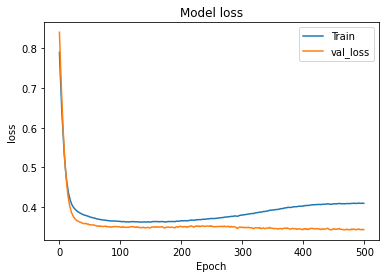

In [30]:
#loss plot vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val_loss'])
plt.show()

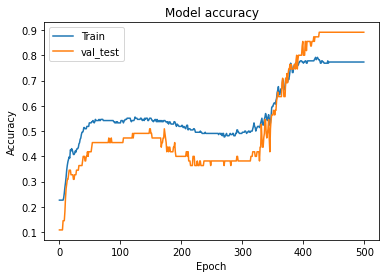

In [31]:
#accuracy plot vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val_test'])
plt.show()

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_log = knn_classifier.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5294117647058824


In [33]:
# calculate best k (n_neighbours) value
scores=[]
for i in range (1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train_scaled, y_train)
    y_log = knn_classifier.predict(X_test_scaled)
    y_pred=np.where(y_log>0.5,1,0)
    scores.append(accuracy_score(y_test, y_pred))

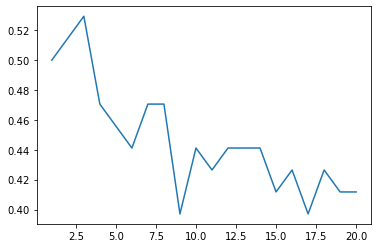

In [34]:
plt.plot(range(1,21),scores)

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=5)#criterion='entropy'
model.fit(X_train_scaled,y_train)
y_log = model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.6029411764705882


# Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=51, random_state=5)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_log = rf_classifier.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5441176470588235


# SVM

In [37]:
X=df1.iloc[:,0:5]
y=df1.iloc[:,5:6]

In [38]:
y

,Crystal System
0,monoclinic
1,monoclinic
2,monoclinic
3,monoclinic
4,monoclinic
...,...
334,triclinic
335,triclinic
336,triclinic
337,triclinic


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [40]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.fit_transform(X_test)
X_train_scaled

array([[ 0.16592273, -0.6556763 , -0.40676648, -1.06703631, -1.01832915],
       [-0.49387271, -1.95412914,  0.89454547, -1.02210672, -1.02671292],
       [ 0.05595682,  1.04230049, -1.89059062, -1.06703631, -1.01912575],
       ...,
       [ 1.35355452,  0.24325259, -0.63673184, -0.48295164, -0.41731368],
       [ 0.09444489, -1.15508124,  0.82792852,  0.77507687,  0.88437374],
       [ 0.27588864, -0.05639037,  0.71477096,  0.77507687,  0.88540401]])

In [41]:
from sklearn.svm import SVC
model = SVC(kernel='poly', C=1.0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4852941176470588


C:\Users\YOGESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Define the number of Monte Carlo iterations
num_iterations = 5

# Perform Monte Carlo Cross-Validation
accuracy_scores = []
for _ in range(num_iterations):
    # Split the data into training and testing sets for each iteration
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Initialize and train the SVM classifier
    svm = SVC(kernel='poly')
    svm.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = svm.predict(X_test)

    # Calculate accuracy and store it for this iteration
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate average accuracy across all iterations
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")


Average Accuracy: 0.85
